# Information

## **Students Information:**


1. Student 1
  * Name = Peyman 
  * Last Name = Naseri
  * Student ID = 4011305965014
2. Student 2
  * Name = Maryam
  * Last Name = HokmAbadi
  * Student ID = 4011305965011




## **Project Information:**
* Course: Applied Data Science
* colab: [link](https://colab.research.google.com/github/peyman886/ADS/blob/main/2_Regression/Regression.ipynb) 
* github: [link](https://github.com/peyman886/ADS/tree/main/2_Regression/Regression.ipynb)

## Regression

### load data

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
columns=boston_dataset.feature_names
boston_df = pd.DataFrame(boston_dataset.data, columns=columns)
target = boston_dataset.target
boston_df['MEDV'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


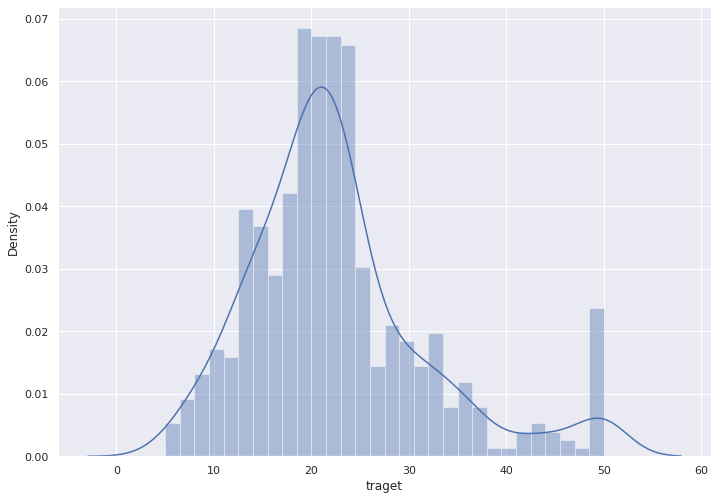

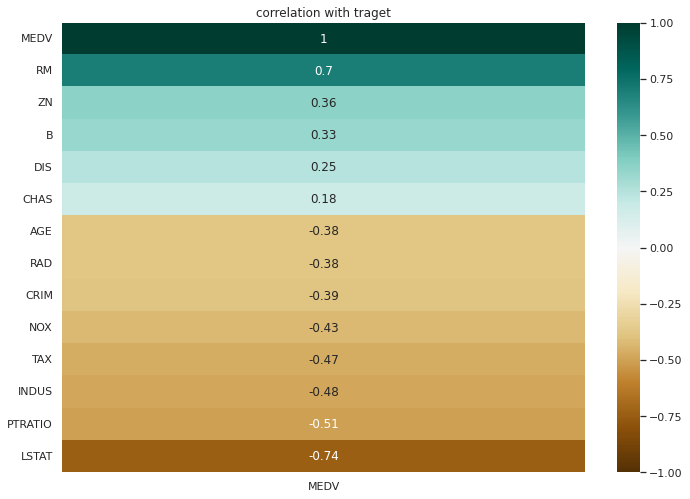

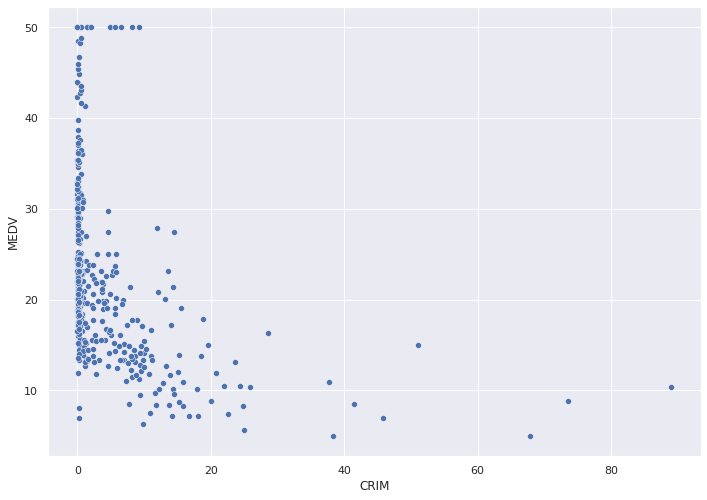

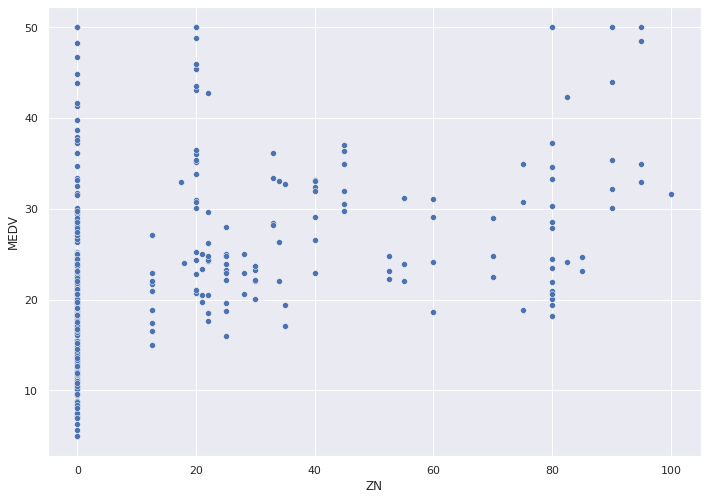

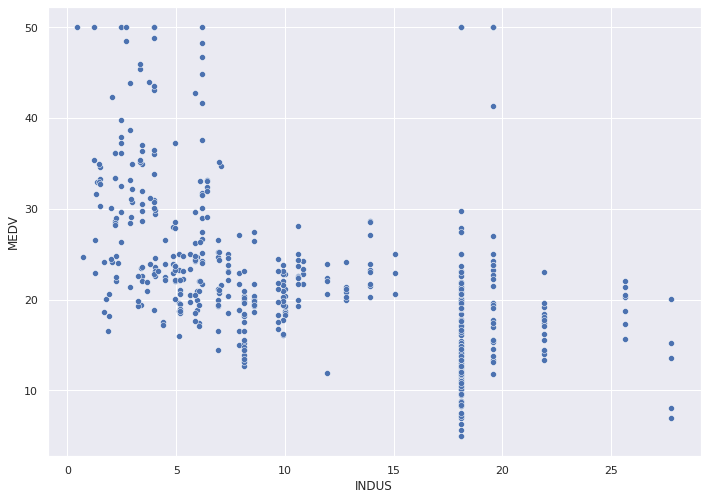

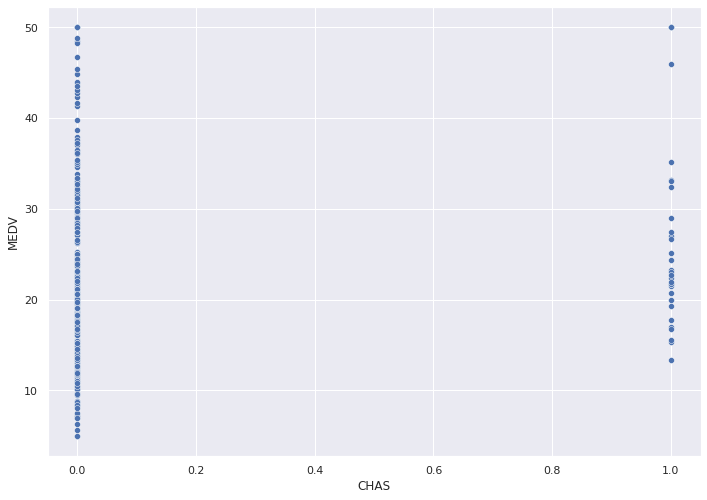

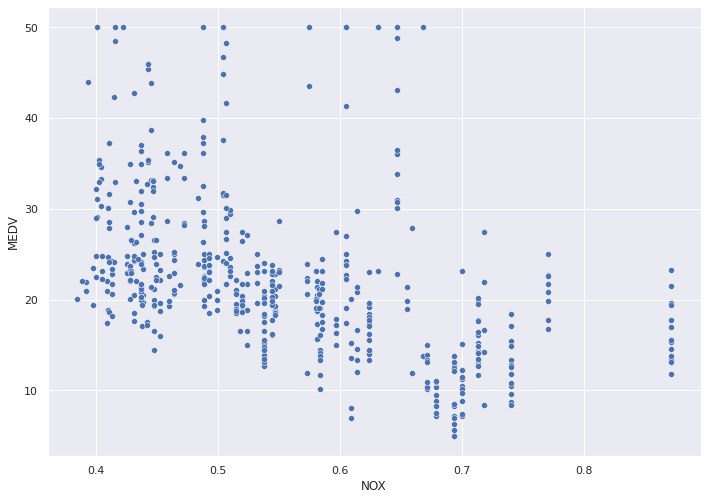

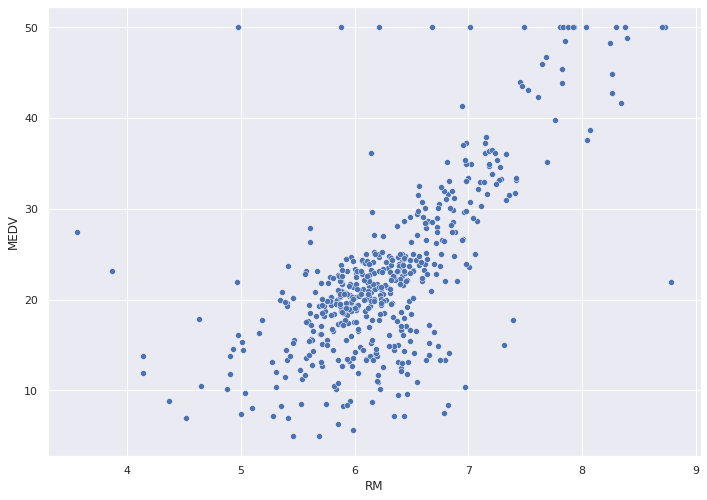

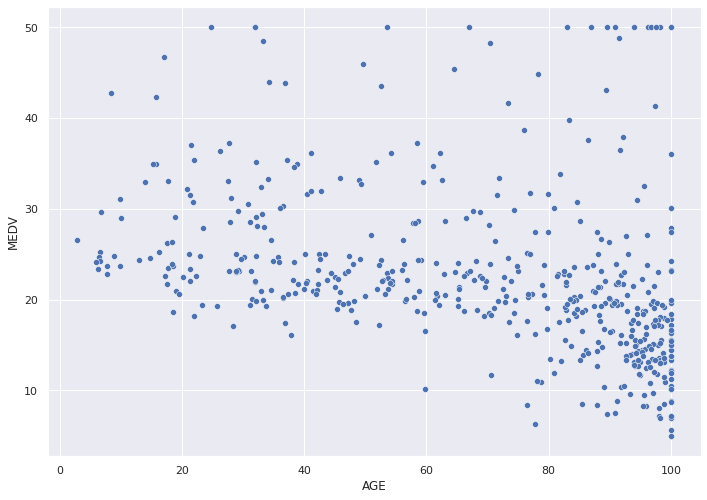

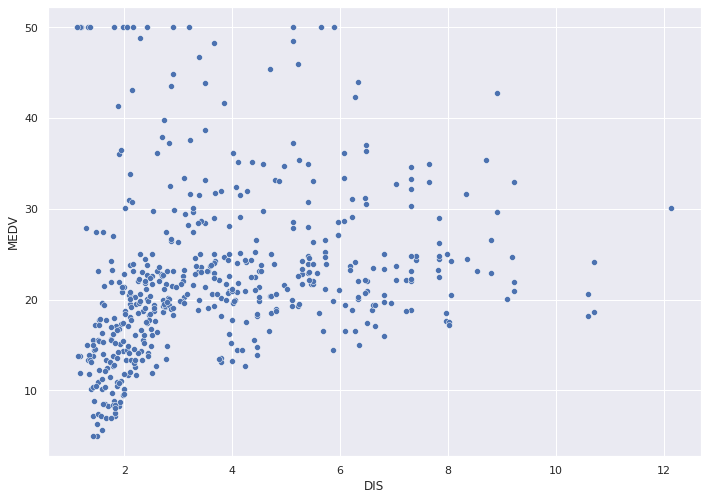

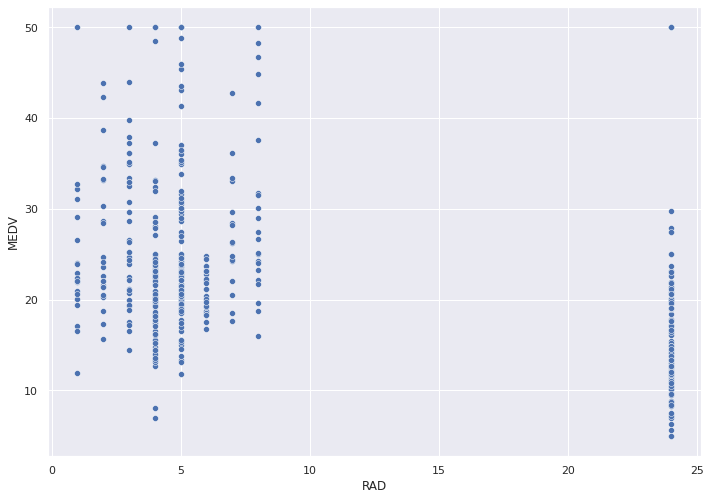

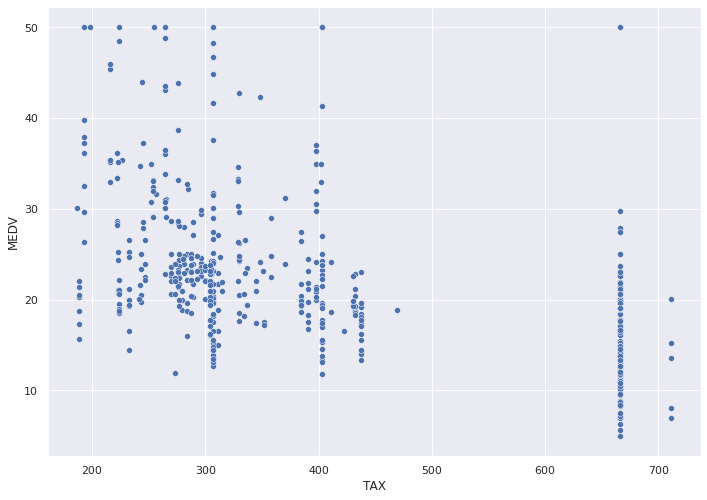

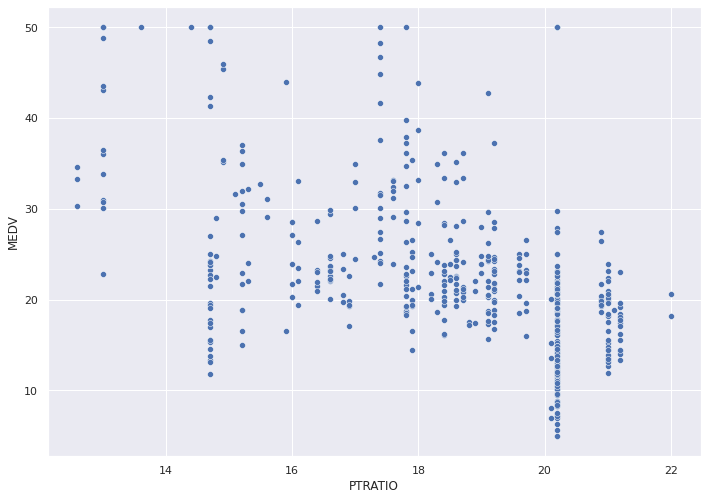

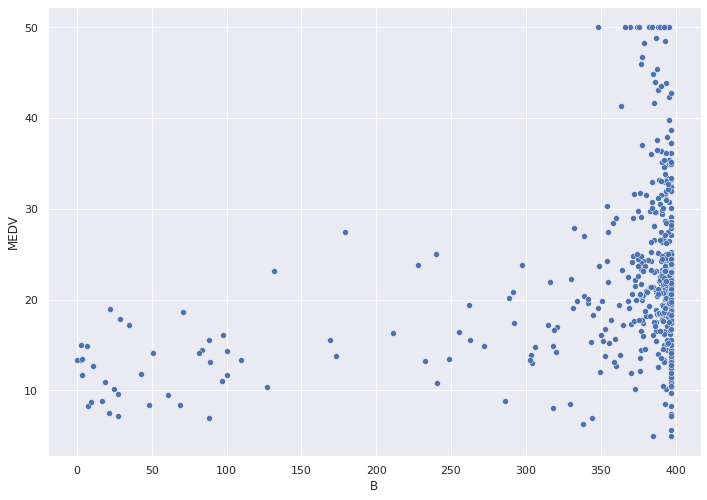

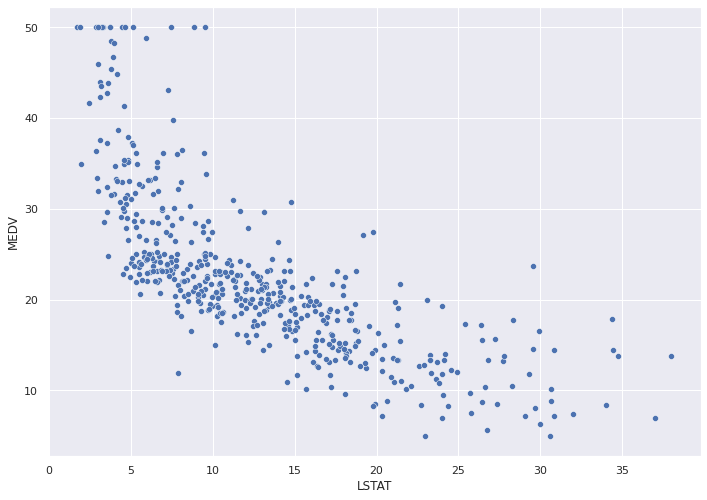

In [ ]:
#plot the distribution of the target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(target, bins=30)
plt.xlabel('traget')
plt.show()

#correlation with traget
sns.heatmap(boston_df.corr()[['MEDV']].sort_values(by='MEDV', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('correlation with traget')
plt.show()

#relation with traget
for col in columns:
    sns.scatterplot(x=boston_df[col], y=target, marker='o')
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

### split data to train and test

In [ ]:
training_data = boston_df.sample(frac=0.8, random_state=5)
testing_data = boston_df.drop(training_data.index)

y_train_df = training_data['MEDV']
y_test_df = testing_data['MEDV']

X_train_df = training_data.drop(columns='MEDV')
X_test_df = testing_data.drop(columns='MEDV')

### main body of code

In [ ]:
# #normalization
# def normalize(df):
#     return (df-df.min())/(df.max()-df.min())
# #     return (df-df.mean())/df.std()

# #Find optimal parameters
# def find_theta(X, y, regularization):
#     if regularization == None:
#       m = X.shape[0] # Number of training examples. 
#       X = np.append(X, np.ones((m,1)), axis=1) # Appending a cloumn of ones in X to add the bias term.
#       y = y.reshape(m,1) # reshaping y to (m,1)
#       # The Normal Equation:
#       theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y)) 

#     elif regularization == "ridge":
#       alpha=1.0
#       X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
#       X_intercept = X_with_intercept
#       # number of columns in matrix of X including intercept
#       dimension = X_with_intercept.shape[1]
#       # Identity matrix of dimension compatible with our X_intercept Matrix
#       A = np.identity(dimension)
#       # set first 1 on the diagonal to zero so as not to include a bias term for
#       # the intercept
#       A[0, 0] = 0
#       # We create a bias term corresponding to alpha for each column of X not
#       # including the intercept
#       A_biased = alpha * A
#       thetas = np.linalg.inv(X_with_intercept.T.dot(
#           X_with_intercept) + A_biased).dot(X_with_intercept.T).dot(y)

#       return theta
      

    
# #Predict Function
# def predict(X, theta): 
#     X = np.append(X, np.ones((X.shape[0],1)), axis=1) # Appending a cloumn of ones in X to add the bias term.
#     # preds is y_hat which is the dot product of X and theta.
#     preds = np.dot(X, theta)
#     return preds

In [ ]:
#return mean squared error
def MSE(y, y_pred):
    return np.mean((y-y_pred)**2)

# return mean absolute error
def MAE(y, y_pred):
  return np.mean(np.abs(y - y_pred))

#return mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
def MAPE(y, y_pred):
  return mean_absolute_percentage_error(y,y_pred)

#return  R2 Error
from sklearn.metrics import r2_score
def R2E(y, y_pred):
  return r2_score(y,y_pred)



In [ ]:
# #find features have max correlation
# def find_max_corrilations(df, measure_corrliation):
#     #Correlation with output variable
    
#     cor_target = abs(df.corr()["MEDV"])
#     sns.heatmap(df.corr()[['MEDV']].sort_values(by='MEDV', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#     plt.title('correlation with traget')
    
#     #Selecting highly correlated features
#     relevant_features = cor_target[cor_target >= measure_corrliation]
#     relevant_features = relevant_features.drop(labels='MEDV')
#     relevant_features = relevant_features.index
#     relevant_features = relevant_features.to_numpy()
#     print('features with max correlation :',relevant_features,end='\n\n')
#     return relevant_features 

# #plotting y and y predicted based on features
# def plotting(X_train, y_train, y_train_preds, X_test, y_test,y_test_preds, features):
#     for i, col in enumerate(features):
#         plt.figure(figsize=(12,4))
#         plt.subplot(1, 2, 1)
#         x = X_train[:,i]
#         y = y_train
#         sns.scatterplot(x, y, label='y', color='b')
#         plt.title('train')

#         y = y_train_preds[:,0]
#         sns.scatterplot(x, y, label='y predicted', color='r')
#         plt.xlabel(col)
#         plt.ylabel('MEDV')

#         plt.subplot(1, 2, 2)
#         x = X_test[:,i]
#         y = y_test
#         sns.scatterplot(x, y, label='y', color='g')
#         plt.title('test')
#         plt.xlabel(col)
#         plt.ylabel('MEDV')
#         y = y_test_preds[:,0]
#         sns.scatterplot(x, y,label='y predicted', color='y')
#         plt.tight_layout()
#         plt.show()      

In [ ]:
# def hamechi(X_train_df, X_test_df, measure_corrliation=0.5, regularization=None):
#   y_train = y_train_df.to_numpy()
#   y_test = y_test_df.to_numpy()
#   X_train = X_train_df.to_numpy()
#   X_test = X_test_df.to_numpy()
#   print('shape X_train :', X_train.shape)
#   print('shape X_test :', X_test.shape)
#   print('shape y_train :', y_train.shape)
#   print('shape y_test :', y_test.shape, end='\n\n')
#   df = X_train_df.copy()
#   df['MEDV'] = y_train_df
#   features = find_max_corrilations(df, measure_corrliation)
#   plotting(X_train, y_train, y_train_preds, X_test, y_test,y_test_preds, features)   
# hamechi(X_train_df=X_train_df, X_test_df=X_test_df)

y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()
X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()
print('shape X_train :', X_train.shape)
print('shape X_test :', X_test.shape)
print('shape y_train :', y_train.shape)
print('shape y_test :', y_test.shape, end='\n\n')

shape X_train : (405, 13)
shape X_test : (101, 13)
shape y_train : (405,)
shape y_test : (101,)



### Models

In [ ]:
from PIL import Image
from sklearn import datasets, metrics
from matplotlib.pyplot import figure

from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

def training(model):
  print(model)
  model.fit(X_train, y_train)
  y_test_preds = model.predict(X_test)
  # print('optimal weight parameters :', model.coef_)
  print('MSE test error :', mean_squared_error(y_test, y_test_preds))
  print('MAE test error :', mean_absolute_error(y_test, y_test_preds))
  print('MAPE test error :', mean_absolute_percentage_error(y_test, y_test_preds))
  print('R2E test error :', r2_score(y_test, y_test_preds))
  print('\n\n\n')